# Treinamento CIS - 2º Período (Classificação)

Nome: Gustavo M. Tonnera

Repositório: https://github.com/GMTonnera/ieee-cis-trainee

## Imports

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importar datasets do google drive

In [246]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Variáveis Globais e Funções auxiliares

#### Datasets

In [247]:
TRAINING_DATAFRAME = pd.read_csv('/content/drive/MyDrive/datasets/classification/df_train.csv')
KAGGLE_DATAFRAME = pd.read_csv('/content/drive/MyDrive/datasets/classification/df_test.csv')
pd.set_option("display.max_columns", None)

#### Funções auxiliares

In [248]:
def checkNullValues(df):
  flag = False
  # Verificar se alguma coluna possui dados faltantes
  for column in df.columns.values:
      x = df[column].isnull().sum()
      if x > 0:
          print(f'{column} = {x}')
          flag = True

  if not flag:
      print("Nenhum dado faltante!")

def fillNullWithMode(df, columns):
  newDf = df.copy()
  print()
  for column in columns:
      mode_value = newDf[column].mode()[0]
      newDf[column] = newDf[column].fillna(mode_value)

  return newDf

def fillNullWithMedian(df, columns):
  newDf = df.copy()
  for column in columns:
      median_value = newDf[column].median()
      newDf[column] = newDf[column].fillna(median_value)

  return newDf

def barChart(xValues, yValues, yLabel, title, yRange, rotation=0):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.bar(xValues, yValues)

  plt.xticks(rotation=90)
  ax.set_ylabel(yLabel)
  ax.set_title(title)
  plt.ylim(yRange)

  plt.show()


def horizontalBarChart(yValues, xValues, title, yLabel, xLabel):
  plt.figure(figsize=(5, 15))
  plt.barh(yValues, xValues)
  plt.title(title)
  plt.ylabel(yLabel)
  plt.xlabel(xLabel)
  plt.show()


def oneHotEncoding(df, columns):
  newDf = df.copy()
  for column in columns:
    one_hot = pd.get_dummies(newDf[column])
    one_hot = one_hot.rename(columns={col: f'{column}-{col}' for col in one_hot.columns})
    for col in one_hot.columns:
      one_hot[col] = one_hot[col].astype(int)
    newDf = newDf.drop(column, axis=1)
    newDf = newDf.join(one_hot)

  return newDf

## Tarefas

### 1. Realize uma análise exploratória dos dados e responda às seguintes questões: existe alguma cidade com taxa de churn significativamente maior? O churn é mais prevalente entre clientes recentes ou antigos? Quais serviços são menos utilizados?

#### a) Existe alguma cidade com taxa de churn significativamente maior?

Para isso, precisamos calcular a taxa de churn para cada cidade. Como o dataset apresenta mais de 1000 cidades distintas, plotaremos no gráfico apenas as 50 cidades com maiores taxas de churn.

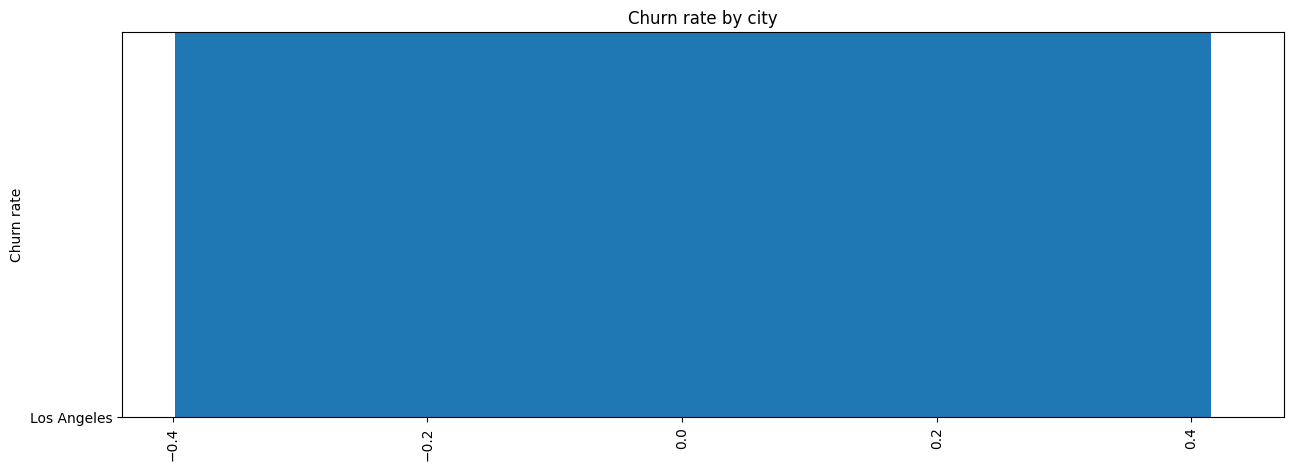

In [249]:
cities = TRAINING_DATAFRAME['City'].unique()
city_data = []

for city in cities:
  numChurn = TRAINING_DATAFRAME[TRAINING_DATAFRAME['City'] == city]['Churn Label'].value_counts().iloc[0]
  churnRate = numChurn / len(TRAINING_DATAFRAME)
  city_data.append((city, churnRate))

city_data.sort(key=lambda x: x[1], reverse=True)

x = list(map(lambda x: x[0], city_data[:50]))
y = list(map(lambda x: x[1], city_data[0:50]))
barChart(y, x, "Churn rate", "Churn rate by city", (0, 0.1))

A partir do gráfico, obervamos que Los Angeles possui a maior taxa de churn com uma diferença significativa em relação a segunda maior taxa de churn (San Diego).

#### b) O churn é mais prevalente entre clientes recentes ou antigos?

Para analisar o Churn entre os clientes, tiraremos a média do valor da coluna 'Tenure Months', a qual nndica o total de meses que o cliente está com a empresa até o final do trimestre especificado acima, quando o valor do 'Churn Label' é 'No' e quando ele é 'Yes'.

In [250]:
TRAINING_DATAFRAME[TRAINING_DATAFRAME['Churn Label'] == 'No']['Tenure Months'].mean()

37.46972102517578

In [251]:
TRAINING_DATAFRAME[TRAINING_DATAFRAME['Churn Label'] == 'Yes']['Tenure Months'].mean()

17.857324032974002

Observa-se que a média de 'Tenure Months' dos Churns com valor 'No' é de 37,47 e a média dos Churns com valor 'Yes' é de 17.86. Dessa forma, Churns negativos tendem a ser clientes mais antigos e Churns positivos tendem a ser clientes mais novos.

#### c) Quais serviços são menos utilizados?

Para descobrir quais serviços são menos utilizados, devemos analisar os valores das seguintes colunas:
- Phone Service
- Internet Service
- Online Security
- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies

In [252]:
TRAINING_DATAFRAME['Phone Service'].value_counts()

,count
Phone Service,
Yes,5401
No,585


In [253]:
TRAINING_DATAFRAME['Internet Service'].value_counts()

,count
Internet Service,
Fiber optic,2608
DSL,2060
No,1318


In [254]:
TRAINING_DATAFRAME['Online Security'].value_counts()

,count
Online Security,
No,2972
Yes,1696
No internet service,1318


In [255]:
TRAINING_DATAFRAME['Online Backup'].value_counts()

,count
Online Backup,
No,2624
Yes,2044
No internet service,1318


In [256]:
TRAINING_DATAFRAME['Device Protection'].value_counts()

,count
Device Protection,
No,2612
Yes,2056
No internet service,1318


In [257]:
TRAINING_DATAFRAME['Tech Support'].value_counts()

,count
Tech Support,
No,2925
Yes,1743
No internet service,1318


In [258]:
TRAINING_DATAFRAME['Streaming TV'].value_counts()

,count
Streaming TV,
No,2394
Yes,2274
No internet service,1318


In [259]:
TRAINING_DATAFRAME['Streaming Movies'].value_counts()

,count
Streaming Movies,
No,2347
Yes,2321
No internet service,1318


Observa-se que os serviços menos consumidos são:
- Streaming Movies
- Streaming TV
- Tech Support
- Device Protection
- Online Backup
- Online Security

### 2. Compare os resultados obtidos entre uma árvore de decisão e uma floresta aleatória em termos de precisão na classificação de churn de clientes. Avalie também outras métricas relevantes, como recall e F1-score, para entender melhor a eficácia de cada modelo na previsão de churn.

#### Tratar os Dados

In [260]:
TRAINING_DATAFRAME

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,3038-PQIUY,1,United States,California,Dulzura,91917,"32.622999, -116.687855",32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
2,1468-DEFNC,1,United States,California,San Jose,95130,"37.277592, -121.986477",37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,6437-UDQJM,1,United States,California,Los Angeles,90023,"34.017697, -118.200577",34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,9490-DFPMD,1,United States,California,Tahoma,96142,"39.061227, -120.179546",39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,8216-AZUUZ,1,United States,California,San Francisco,94118,"37.781304, -122.461522",37.781304,-122.461522,Female,No,Yes,Yes,42,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,100.40,4303.65,No,3265
5982,5006-MXVRN,1,United States,California,Keyes,95328,"37.555631, -120.911653",37.555631,-120.911653,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.70,762.45,No,3733
5983,4804-NCPET,1,United States,California,Clearlake,95422,"38.965804, -122.631779",38.965804,-122.631779,Male,No,Yes,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,387.4,No,4821
5984,2878-DHMIN,1,United States,California,Sacramento,95833,"38.619049, -121.517552",38.619049,-121.517552,Male,No,Yes,Yes,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,666,No,2334


###### Retirar colunas

Primeiramente, as colunas "CustomerID", "Count", "Country", "State", "Zip Code", "Lat Long" e "City" e "Longitude" serão retiradas do dataset. "CustomerID" e "Count" não descrevem características importantes do sobre os clientes. Todos os valores de "Country" e "State" são iguais, então essas colunas também serão desconsideras. "Zip Code", "Lat Long", "City", "Latitude" e "Longitude" estão muito relacionadas entre si, então desconsideraremos "Zip Code", "Lat Long" e "City", devido a dificuldade de codificar numericamente essas variáveis.

In [261]:
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'City'])
TRAINING_DATAFRAME

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
2,37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,37.781304,-122.461522,Female,No,Yes,Yes,42,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,100.40,4303.65,No,3265
5982,37.555631,-120.911653,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.70,762.45,No,3733
5983,38.965804,-122.631779,Male,No,Yes,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,387.4,No,4821
5984,38.619049,-121.517552,Male,No,Yes,Yes,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,666,No,2334


In [262]:
KAGGLE_DATAFRAME = KAGGLE_DATAFRAME.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'City'])
KAGGLE_DATAFRAME

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,35.214982,-118.590490,Female,No,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.90,1269.55,3579
1,38.002125,-121.324979,Male,No,Yes,No,18,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),56.80,1074.65,5558
2,37.687264,-122.157280,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.00,40.90,2237
3,34.146957,-118.432138,Male,Yes,Yes,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.20,519.15,5834
4,33.581045,-117.147190,Male,No,No,No,40,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),104.80,4131.95,3492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,39.424957,-122.039307,Female,No,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,5942
1053,32.741499,-117.127409,Female,Yes,Yes,No,27,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.25,2754.45,4853
1054,37.750021,-122.415201,Male,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.10,7848.50,6283
1055,36.397745,-120.119911,Male,No,No,No,62,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,96.75,6125.40,5016


##### Dados Faltantes

In [263]:
checkNullValues(TRAINING_DATAFRAME)

Nenhum dado faltante!


##### Verificar tipos das colunas

In [264]:
TRAINING_DATAFRAME.dtypes

,0
Latitude,float64
Longitude,float64
Gender,object
Senior Citizen,object
Partner,object
Dependents,object
Tenure Months,int64
Phone Service,object
Multiple Lines,object
Internet Service,object


In [265]:
TRAINING_DATAFRAME[TRAINING_DATAFRAME['Total Charges'] == ' ']

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
446,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,4890
502,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,2299
1874,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,5504
3234,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,2019
3249,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,4740
3833,33.782068,-118.262263,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,5188
4347,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,2578
4407,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,4950
5434,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,3763
5677,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,2342


Obervamos que a coluna "Total Charge" está no formato de string e alguns valores de algumas linhas dessa coluna não podem ser convertidos para float. Como apenas 11 linhas possuem valores que não podem ser convertidos para float, removeremos essas linhas do dataset.

In [266]:
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(446)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(502)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(1874)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(3234)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(3249)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(3833)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(4347)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(4407)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(5434)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(5677)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.drop(5870)
TRAINING_DATAFRAME = TRAINING_DATAFRAME.reset_index(drop=True)

Agora podemos converter os valores da coluna "Total Charges" para float.

In [267]:
TRAINING_DATAFRAME['Total Charges'] = TRAINING_DATAFRAME['Total Charges'].astype(float)

Além disso, precisamos converter os valores da variável "Churn Label" para valores numéricos.

In [268]:
TRAINING_DATAFRAME['Churn Label'] = TRAINING_DATAFRAME['Churn Label'].map({'Yes': 1, 'No': 0})
TRAINING_DATAFRAME['Churn Label'] = TRAINING_DATAFRAME['Churn Label'].astype(int)
TRAINING_DATAFRAME

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,3964
1,32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.40,0,4933
2,37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,0,4772
3,34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,0,4999
4,39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,1,4871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,37.781304,-122.461522,Female,No,Yes,Yes,42,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,100.40,4303.65,0,3265
5971,37.555631,-120.911653,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.70,762.45,0,3733
5972,38.965804,-122.631779,Male,No,Yes,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,387.40,0,4821
5973,38.619049,-121.517552,Male,No,Yes,Yes,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,666.00,0,2334


In [269]:
TRAINING_DATAFRAME.dtypes

,0
Latitude,float64
Longitude,float64
Gender,object
Senior Citizen,object
Partner,object
Dependents,object
Tenure Months,int64
Phone Service,object
Multiple Lines,object
Internet Service,object


In [270]:
checkNullValues(TRAINING_DATAFRAME)

Nenhum dado faltante!


##### One Hot Encoding

Agora faremos o One Hot Encoding das variáveis categóricas nomiais.

In [271]:
columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
TRAINING_DATAFRAME = oneHotEncoding(TRAINING_DATAFRAME, columns)
TRAINING_DATAFRAME

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,CLTV,Gender-Female,Gender-Male,Senior Citizen-No,Senior Citizen-Yes,Partner-No,Partner-Yes,Dependents-No,Dependents-Yes,Phone Service-No,Phone Service-Yes,Multiple Lines-No,Multiple Lines-No phone service,Multiple Lines-Yes,Internet Service-DSL,Internet Service-Fiber optic,Internet Service-No,Online Security-No,Online Security-No internet service,Online Security-Yes,Online Backup-No,Online Backup-No internet service,Online Backup-Yes,Device Protection-No,Device Protection-No internet service,Device Protection-Yes,Tech Support-No,Tech Support-No internet service,Tech Support-Yes,Streaming TV-No,Streaming TV-No internet service,Streaming TV-Yes,Streaming Movies-No,Streaming Movies-No internet service,Streaming Movies-Yes,Contract-Month-to-month,Contract-One year,Contract-Two year,Paperless Billing-No,Paperless Billing-Yes,Payment Method-Bank transfer (automatic),Payment Method-Credit card (automatic),Payment Method-Electronic check,Payment Method-Mailed check
0,33.973616,-118.249020,1,29.85,29.85,0,3964,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,32.622999,-116.687855,38,66.15,2522.40,0,4933,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
2,37.277592,-121.986477,64,24.40,1548.65,0,4772,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0
3,34.017697,-118.200577,72,84.10,6129.65,0,4999,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
4,39.061227,-120.179546,42,84.65,3541.35,1,4871,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,37.781304,-122.461522,42,100.40,4303.65,0,3265,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
5971,37.555631,-120.911653,39,20.70,762.45,0,3733,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
5972,38.965804,-122.631779,19,20.20,387.40,0,4821,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
5973,38.619049,-121.517552,35,19.90,666.00,0,2334,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [272]:
KAGGLE_DATAFRAME = oneHotEncoding(KAGGLE_DATAFRAME, columns)
KAGGLE_DATAFRAME

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender-Female,Gender-Male,Senior Citizen-No,Senior Citizen-Yes,Partner-No,Partner-Yes,Dependents-No,Dependents-Yes,Phone Service-No,Phone Service-Yes,Multiple Lines-No,Multiple Lines-No phone service,Multiple Lines-Yes,Internet Service-DSL,Internet Service-Fiber optic,Internet Service-No,Online Security-No,Online Security-No internet service,Online Security-Yes,Online Backup-No,Online Backup-No internet service,Online Backup-Yes,Device Protection-No,Device Protection-No internet service,Device Protection-Yes,Tech Support-No,Tech Support-No internet service,Tech Support-Yes,Streaming TV-No,Streaming TV-No internet service,Streaming TV-Yes,Streaming Movies-No,Streaming Movies-No internet service,Streaming Movies-Yes,Contract-Month-to-month,Contract-One year,Contract-Two year,Paperless Billing-No,Paperless Billing-Yes,Payment Method-Bank transfer (automatic),Payment Method-Credit card (automatic),Payment Method-Electronic check,Payment Method-Mailed check
0,35.214982,-118.590490,15,85.90,1269.55,3579,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0
1,38.002125,-121.324979,18,56.80,1074.65,5558,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,37.687264,-122.157280,2,20.00,40.90,2237,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,34.146957,-118.432138,6,84.20,519.15,5834,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,33.581045,-117.147190,40,104.80,4131.95,3492,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,39.424957,-122.039307,60,110.80,6640.70,5942,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
1053,32.741499,-117.127409,27,101.25,2754.45,4853,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
1054,37.750021,-122.415201,72,106.10,7848.50,6283,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
1055,36.397745,-120.119911,62,96.75,6125.40,5016,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0


#### Separar dataset

In [273]:
from sklearn.model_selection import train_test_split

y = TRAINING_DATAFRAME["Churn Label"]
X = TRAINING_DATAFRAME.drop("Churn Label", axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

#### Decision Tree

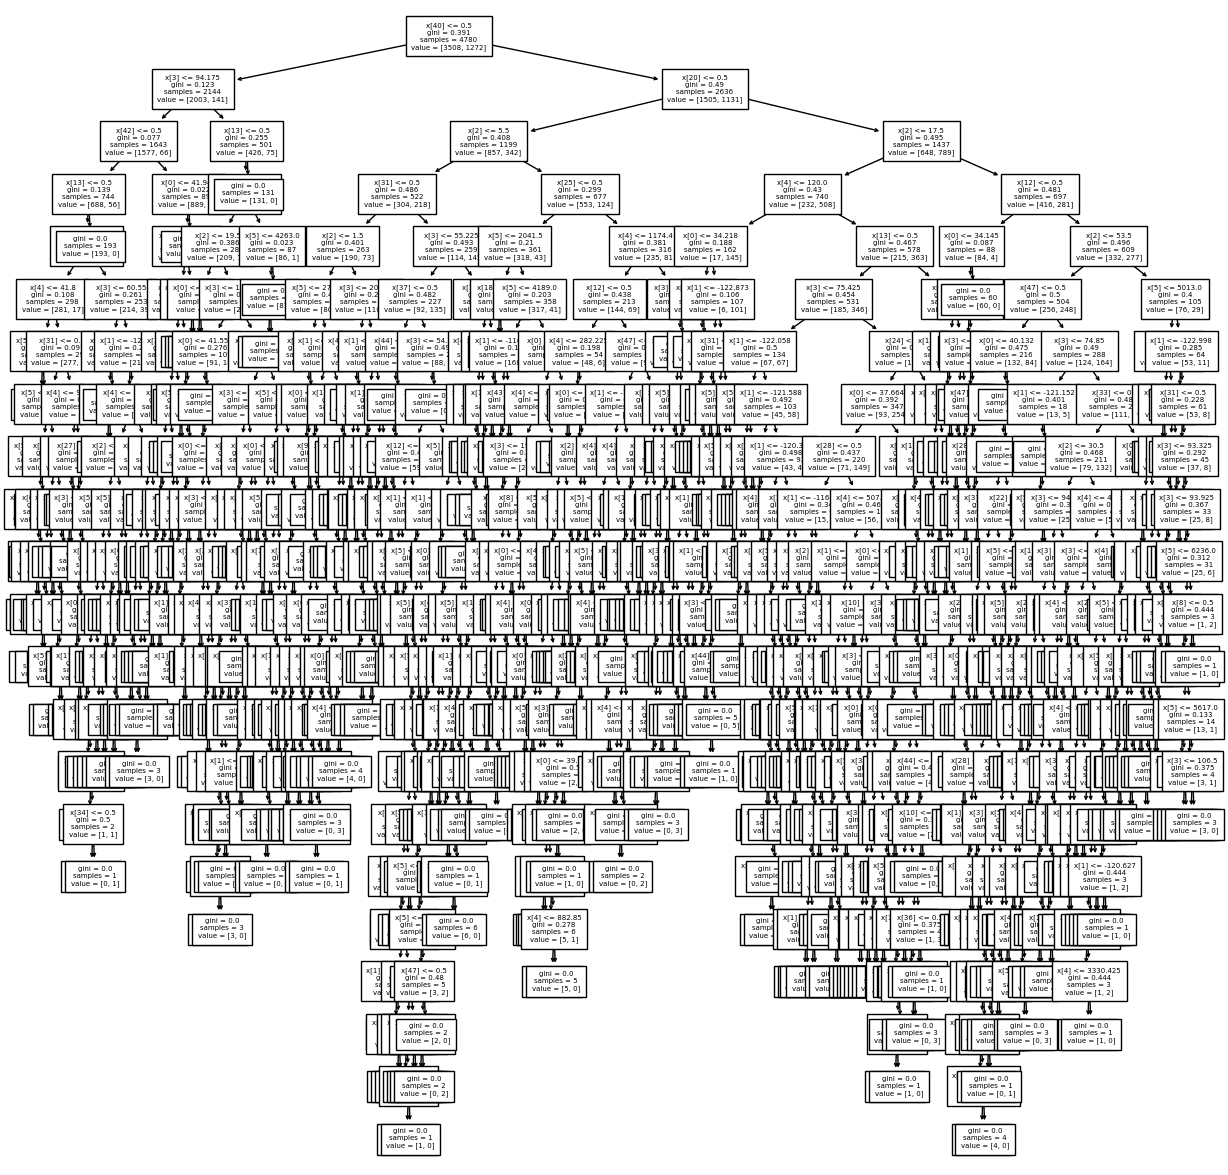

In [274]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
plt.figure(figsize=(15,15))
tree.plot_tree(clf, fontsize=5)

plt.show()

In [275]:
from sklearn.metrics import recall_score, f1_score

y_pred = clf.predict(x_test)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
score = clf.score(x_test, y_test)

print(f"Score: {score}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Score: 0.7313807531380753
Recall: 0.4721311475409836
F1 Score: 0.4729064039408867


#### Random Forest

In [276]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [277]:
y_pred = rf.predict(x_test)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
score = rf.score(x_test, y_test)

print(f"Score: {score}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Score: 0.7874476987447698
Recall: 0.47540983606557374
F1 Score: 0.5330882352941176


### 3. Demonstre o uso da validação cruzada para avaliar o desempenho de um modelo de machine learning. Inclua uma descrição dos tipos comuns de validação cruzada e como cada um pode ser aplicado para melhorar a generalização do modelo.

Para demonstrar o uso da validação cruzada, usaremos uma SVM (Support Vector Machine) para classificar os Churns do dataset das questões anteriores.

In [278]:
from sklearn.svm import SVC

svm = SVC()

y = TRAINING_DATAFRAME["Churn Label"]
X = TRAINING_DATAFRAME.drop("Churn Label", axis=1)

Para treinar o algoritmo, usaremos a validação cruzada. Existem vários tipos de validação cruzada, sendo os seguintes tipos os mais usados:
- Holdout: consiste em dividir o conjunto total de dados em dois subconjuntos mutuamente exclusivos, um para treinamento (estimação dos parâmetros) e outro para teste (validação);
- Método k-fold: consiste em dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros;
- Método leave-one-out: O método leave-one-out é um caso específico do k-fold, com k igual ao número total de dados N.

Nessa questão, usaremos o método k-fold com k = 10.

In [279]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {i} --> Train set: {len(train_index)}, Test set:{len(test_index)}")


Fold 0 --> Train set: 5377, Test set:598
Fold 1 --> Train set: 5377, Test set:598
Fold 2 --> Train set: 5377, Test set:598
Fold 3 --> Train set: 5377, Test set:598
Fold 4 --> Train set: 5377, Test set:598
Fold 5 --> Train set: 5378, Test set:597
Fold 6 --> Train set: 5378, Test set:597
Fold 7 --> Train set: 5378, Test set:597
Fold 8 --> Train set: 5378, Test set:597
Fold 9 --> Train set: 5378, Test set:597


In [280]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X, y, scoring="accuracy", cv=kf)
scores.mean()

0.7360713825537947

Utilizando o k-fold com k = 10, conseguimos uma acurácia de 0.74 para a SVM.

### 4. Como a aplicação de técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais), afeta o desempenho dos modelos de predição de churn?

Aplicaremos o PCA no dataset e compararemos o desempenho das Decision Trees e das Random Forests.

In [283]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


pipe1 = Pipeline([('pca', PCA(n_components=0.95)), ('decision_tree', tree.DecisionTreeClassifier())])
pipe2 = Pipeline([('pca', PCA(n_components=0.95)), ('random_forest', RandomForestClassifier())]
)

pipe1.fit(x_train, y_train)
pipe2.fit(x_train, y_train)

print(f"Decision Tree Score = {pipe1.score(x_test, y_test)}")
print(f"Randow Forest Score = {pipe2.score(x_test, y_test)}")

Decision Tree Score = 0.6468619246861924
Randow Forest Score = 0.7020920502092051


Podemos observar que o PCA diminuiu os Scores de ambos os modelos.